# 2. Dimensionality reduction

### The curse of dimensionality

## 2.1. Feature selection
Feature selection refers to the tasks that remove low quality data, hence keep informative features. It helps reduce noises and computational cost. Here are some feature selection techniques, they can be implemented very easily.

### Filter methods
Filter methods use Descriptive Statistics to decide which feature to be filtered out.

- *Missing ratio evaluation*. Features having more than 40-50% of missing values can be dropped.

- *Low variance filtering*. Think about a constant feature, whose all observations have the same value, it has no predictive power and cannot explain the target variable. Therefore, features with very low variance can be safely removed.

- *High correlation filtering*. A pair of features having a high Pearson's correlation coefficient means they are very similar to each other, and they will bring the same information to the predictive model. Such a situation is call *multi-colinearity*, and it can mislead some Machine Learning algorithms. Therefore, only 1 variable in the high correlated pair should be used.

### Wrapper methods
Wrapper methods run Machine Learning algorithms on a subsets of the dataset to detect unimporatant features.

- *Feature importances analysis*. Some ML algorithms have the ability to return feature importances. For example, Linear Regression uses variable weights and Decision Tree uses sum of information gains. Feature importances express how much information features contribute on predicting the target variable. In this approach, low important features will be removed.

- *Backward feature elimination*. The idea of this technique is to fit an algorithm on all input variables and consecutively remove one feature at a time that worst reduces model score. This procedure stops when model score no longer changes.

- *Foward feature construction*. This is basically the inverse process of the previous techique, it fits model and evaluate the results untill all significant features have been visited. Both backward elimination and foward construction are greedy algorithms, therefore they are not suite for large scale data.

## 2.2. Principle Component Analysis

**1. Principal Component Analysis (PCA)**

PCA is a popular linear dimesionality reduction technique. In some problems, the number of features can be a thousand and it hard to collect enough data for each feature. This also cause overfitting for the model then dimesionality reduction is important. In easy way, dimesionality reduction is a function - with input is $\mathbf{x} \in \mathbb{R}^D$ ($D$ is very large) and output is $\mathbf{z} \in \mathbb{R}^K$ ($K < D$)

**PCA makes maximum variability in the dataset more visible by rotating the axes**. In new coordinate, the importance of each feature will be more visible and we can delete the least important features.

![image](data/pca.png)


**The work flow:**
1. Split $x$ and $y$ of dataset, assume that new dataset has *d dimensional* corresponding to *d columns of $x$*
Student|Math|English|Art
:---:|:------:|:---:|:--:|
1 | 90 | 60 | 90
2 | 90 | 90 | 30
3 | 60 | 60 | 60
4 | 60 | 60 | 90
5 | 30 | 30 | 30

Rewrite dataframe to matrix 
$$A = 
\begin{bmatrix}
90 & 60 & 90 \\
90 & 90 & 30 \\
60 & 60 & 60 \\
60 & 60 & 90 \\
30 & 30 & 30 \\
\end{bmatrix}
$$
2. Compute the *covariance matrix* of matrix. Find the most variability variable on the diagonal of covariance matrix.

$$
cov = 
\begin{bmatrix}
504 & 360 & 180 \\
360 & 360 &   0 \\
180 &   0 & 720 \\
\end{bmatrix}
$$
3. Conpute *Eigenvectors and  eigenvalues* of covariance matrix
$$Eigenvalues: [ 44.819, 910.069, 629.110]$$

4. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a *d x k dimensional matrix $W$*

$$W = [-0.65580225, -0.4291978 , -0.62105769]\\
      [-0.3859988 , -0.51636642,  0.7644414 ]$$
      
5. Use $W$ - eigenvector matrix to transform the samples onto new subspace.
$$x_{new}= x . W'$$
With $W'$ is the transpose of $W$ and $x_{new}$ is $k$ principal components on a new subspace

*Reference:* [Mathematics behind PCA](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643)

**Describe mathematics behind PCA**

In [1]:
import numpy as np
import pandas as pd

In [2]:
math = np.array([90,90,60,60,30])
english = np.array([60, 90, 60, 60, 30])
art = np.array([90, 30, 60, 90, 30])

In [3]:
cov = np.cov([math, english, art])
covn = cov/1.25
covn

array([[504., 360., 180.],
       [360., 360.,   0.],
       [180.,   0., 720.]])

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(covn)

In [5]:
eigenvalues

array([ 44.81966028, 910.06995304, 629.11038668])

In [6]:
np.sort(eigenvalues)

array([ 44.81966028, 629.11038668, 910.06995304])

In [7]:
eigenvectors

array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]])

In [8]:
W = eigenvectors[:, 1:3]
W = W.T
W

array([[-0.65580225, -0.4291978 , -0.62105769],
       [-0.3859988 , -0.51636642,  0.7644414 ]])

In [9]:
A = np.array([math, english, art]).T
A

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]])

In [10]:
x_new = np.dot(A, W.T)
x_new

array([[-140.6692628 ,    3.07784927],
       [-116.28173533,  -58.27962721],
       [-102.36346447,   -8.27542884],
       [-120.99519515,   14.65781313],
       [ -51.18173223,   -4.13771442]])

**PCA with sklearn**

**Problem:** Find the countries which need aid from WTO depend on information about economic and healthcare.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
df = pd.read_csv('data/country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [76]:
x = df.drop(columns=['country'])
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [77]:
ss = StandardScaler()
ss.fit_transform(x)

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [78]:
pca = PCA(n_components=2)
pc_df = pd.DataFrame(data = pca.fit_transform(x), columns = ['PC1', 'PC2'])
pc_df.head()

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


In [79]:
pca.explained_variance_ratio_

array([0.94792307, 0.05207346])

In [80]:
import seaborn as sns 
from sklearn.cluster import KMeans

In [81]:
kmean = KMeans(n_clusters=4)
kmean.fit(pc_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
group = kmean.fit_predict(pc_df)
result = pd.DataFrame(pc_df)
result['group'] = group
result.head()

,PC1,PC2,group
0,-19815.128018,-1651.124720,0
1,-11338.938992,1493.469028,0
2,-8926.352589,3264.684102,0
3,-14652.465937,-867.795270,0
4,896.142032,1898.478151,2


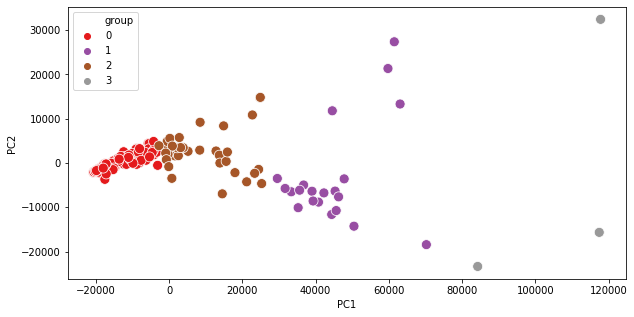

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=result, x='PC1', y='PC2', hue='group',palette='Set1', s=100)

In [90]:
d_country = pd.concat([result, df[['country']]], axis = 1)
d_country[d_country['group']==0]

,PC1,PC2,group,country
0,-19815.128018,-1651.124720,0,Afghanistan
1,-11338.938992,1493.469028,0,Albania
2,-8926.352589,3264.684102,0,Algeria
3,-14652.465937,-867.795270,0,Angola
6,-14283.944388,-92.967224,0,Armenia
9,-5725.513089,4391.181823,0,Azerbaijan
12,-19071.076155,-1229.949789,0,Bangladesh
14,-5449.620912,4390.499532,0,Belarus
16,-12657.029819,-96.344094,0,Belize
17,-19521.704558,-1655.858612,0,Benin


## 2.3. Linear Discriminant Analysis

**2. Linear Discriminant Analysis (LDA)**

LDA is a supervised learning method of dimesionality reduntion for classification, this can be used for dimesionality reduntion or classification or both of them - means use LDA to reduce the data dimension for the most effective classification.
`Discriminant` means special features of each class, `Linear` means linear transform - the data dimension reduction is performed by a projection matrix.

**2.1. Simple Idea behind LDA**

![image](data/lda.png)

The problem is we need to split 2 classes: blue and red data. In `a,`, both classes are too scattered making the overlap ratio (gray area part) large, this means data is not discriminantive. In `b,`, the standard deviation of 2 classes are small but the distance between two expectation is too small, this make overlap ratio large. And in `c,`, the standard deviation of 2 classes are small and the distance between two expectation is large, the overlap is small.

The small standard deviation represents less scattering of the data. This means that the data in each class tends to be the same. Two variances $s_1, s_2$ are called `within-class variances`. The large gap between expectations proves that the two classes are far apart, the data between classes is much different. Square the distance between two expectations $(m_1-m_2)^2$ is called `between-class variance`

Two class are called **discriminant** if between-class variance is huge and within-class variance is small. LDA is a algorithm which find a projection to maximum the ratio between within-class variances and between-class variance

*Reference: [Linear discriminant analysis](https://machinelearningcoban.com/2017/06/30/lda/)*

**2.2. Target function**

Assume that we have $N$ data points $x_1, x_2, \dots, x_n$, in which $N_1 < N$ first points belong to class 1, $N_2 = N - N_1$ points belong to class 2. The projection is described by a vector $W$, the new data points are:
$$y_n = W^T . x_n$$

**Expectation vector**:
$$\mathbf{m}_k = \frac{1}{N_k}\sum_{n \in \mathcal{C}_k}\mathbf{x}_n,~~~ k = 1, 2 ~~~~$$

Then:
$$m_1 - m_2 = \frac{1}{N_1}\sum_{i \in \mathcal{C}_1}y_i - \frac{1}{N_2}\sum_{j \in \mathcal{C}_2}y_j =  \mathbf{w}^T(\mathbf{m}_1 - \mathbf{m}_2) ~~~~ $$

**Within-class variances:**
$$s_k^2 = \sum_{n \in \mathcal{C}_k} (y_n - m_k)^2, ~~ k = 1, 2 ~~~~ $$

**LDA will find the maximum value of target function:**
$$J(\mathbf{w}) = \frac{(m_1 - m_2)^2}{s_1^2 + s_2^2}$$

**2.3. Multi-classes classification with LDA**

Assume that numbers of new dimesion is $D' < D$, new data coresponse to $x$ is:
$$y = W^T.x$$

- Within-class variances of class $k$:
$$\begin{eqnarray}
\sigma_k^2 &=& \sum_{n \in \mathcal{C}_k} (\mathbf{y}_n -\mathbf{e}_k)^2 \\
&=& (\mathbf{W}^T (\mathbf{X}_k - \mathbf{M}_k))^2 &
\end{eqnarray}$$

With:\
$e_k$: expectation vector of class $k$ in new space\
$m_k$: expectation vector of class $k$ in old space\
$X_k, Y_k$: data matrix of class $k$ in old space and new space

- Between-class variance:
$$s_B = \sum_{k=1}^C N_k ({e}_k - {e})^2 = \sum_{k=1}^C ({E}_k - E)^2$$

With:\
$N_k$: numbers of points in class $k$\
$e$: expectation vector of all class

**Loss function:**

$$W = \arg\max J(W) = \frac{\sigma^2}{s_B}$$

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x = iris.data
y = iris.target

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [32]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
lda.explained_variance_ratio_

array([0.99390364, 0.00609636])

In [34]:
train_score = lda.score(x_train, y_train)
test_score = lda.score(x_test, y_test)

print(f'accuracy for train set is {train_score}')
print(f'accuracy for test set is {test_score}')

accuracy for train set is 0.9809523809523809
accuracy for test set is 0.9777777777777777


In [39]:
train_df = pd.DataFrame(lda.fit_transform(x_train, y_train),
                        columns=['LDA1','LDA2'])
train_df['class'] = y_train
train_df.head()

,LDA1,LDA2,class
0,4.970070,-0.344928,2
1,1.714130,-1.313460,1
2,-6.519435,-1.063749,0
3,-6.264658,-0.295488,0
4,3.127009,-0.218253,1


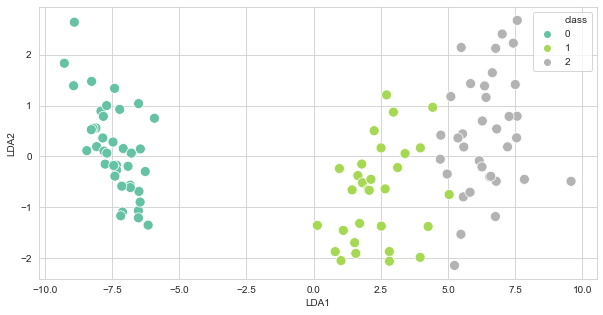

In [64]:
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.scatterplot(data = train_df, x='LDA1', y='LDA2', hue='class', palette='Set2', s=100)

In [23]:
y_pred = lda.predict(x_test)

In [65]:
test_df = pd.DataFrame(lda.fit_transform(x_test, y_test),
                        columns=['LDA1','LDA2'])
test_df['class'] = y_pred
test_df.head()

,LDA1,LDA2,class
0,5.017269,2.225811,2
1,6.086837,1.970519,2
2,2.583906,0.736939,2
3,-1.161554,-0.871624,1
4,-8.080134,-0.036636,0


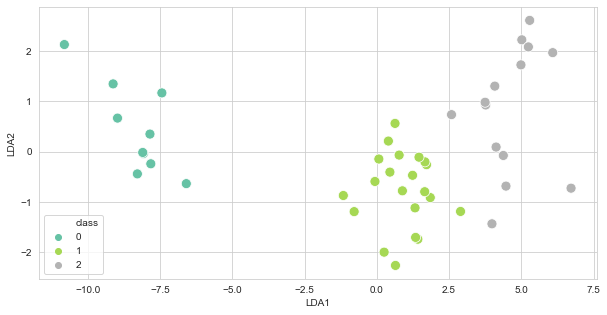

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = test_df, x='LDA1', y='LDA2', hue='class', palette='Set2',s =100)

## 2.4. t-distributed Stochastic Neighbor Embedding

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*